In [24]:
import os
import cv2
import urllib
import numpy as np
import random
import urllib.request
from zipfile import ZipFile
import matplotlib.pyplot as plt


from lib.layers import *
from lib.activations import *
from lib.metrics import Loss_CategoricalCrossentropy, Accuracy_Categorical
from lib.optimizers import *
from lib.model import *
from lib.dataset import ImageClassificationDataset

In [27]:
URL = 'https://balintdaniel.com/cloud/index.php/s/ZTMfTmKyj7y5XTJ/download?path=%2Fdatasets&files=classification_dataset.zip'
FILE = 'classification_dataset.zip'

if not os.path.isfile(FILE):
    print(f'Downloading {URL} and saving as {FILE}...')
    urllib.request.urlretrieve(URL, FILE)

print('Unzipping images...')
with ZipFile(FILE) as zip_images:
    zip_images.extractall("./")
print('Done!')

Unzipping images...
Done!


In [28]:
dataset = ImageClassificationDataset()
dataset.load("classification_dataset", size=28, binary=False)
dataset.augment()
dataset.balance()
dataset.preprocess(
     white_balance = True
)
dataset.shuffle()
dataset.normalize()
dataset.reshape()

X_train, y_train, X_valid, y_valid, X_test, y_test = dataset.split()

Train batch contains 49_000 images
Validation batch contains 14_000 images
Test batch contains 7_000 images


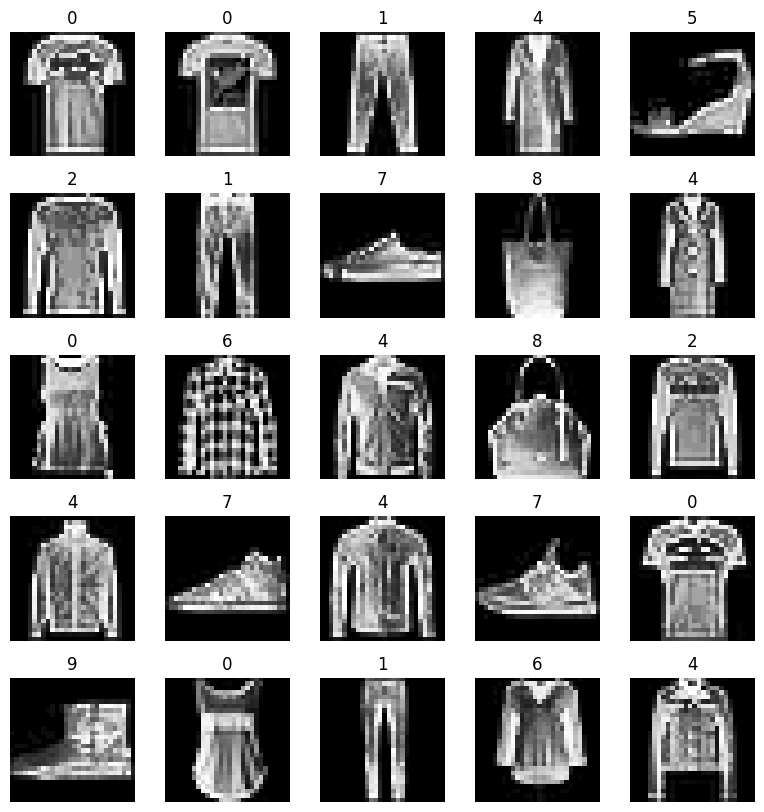

In [29]:
dataset.visualize_dataset_preview()

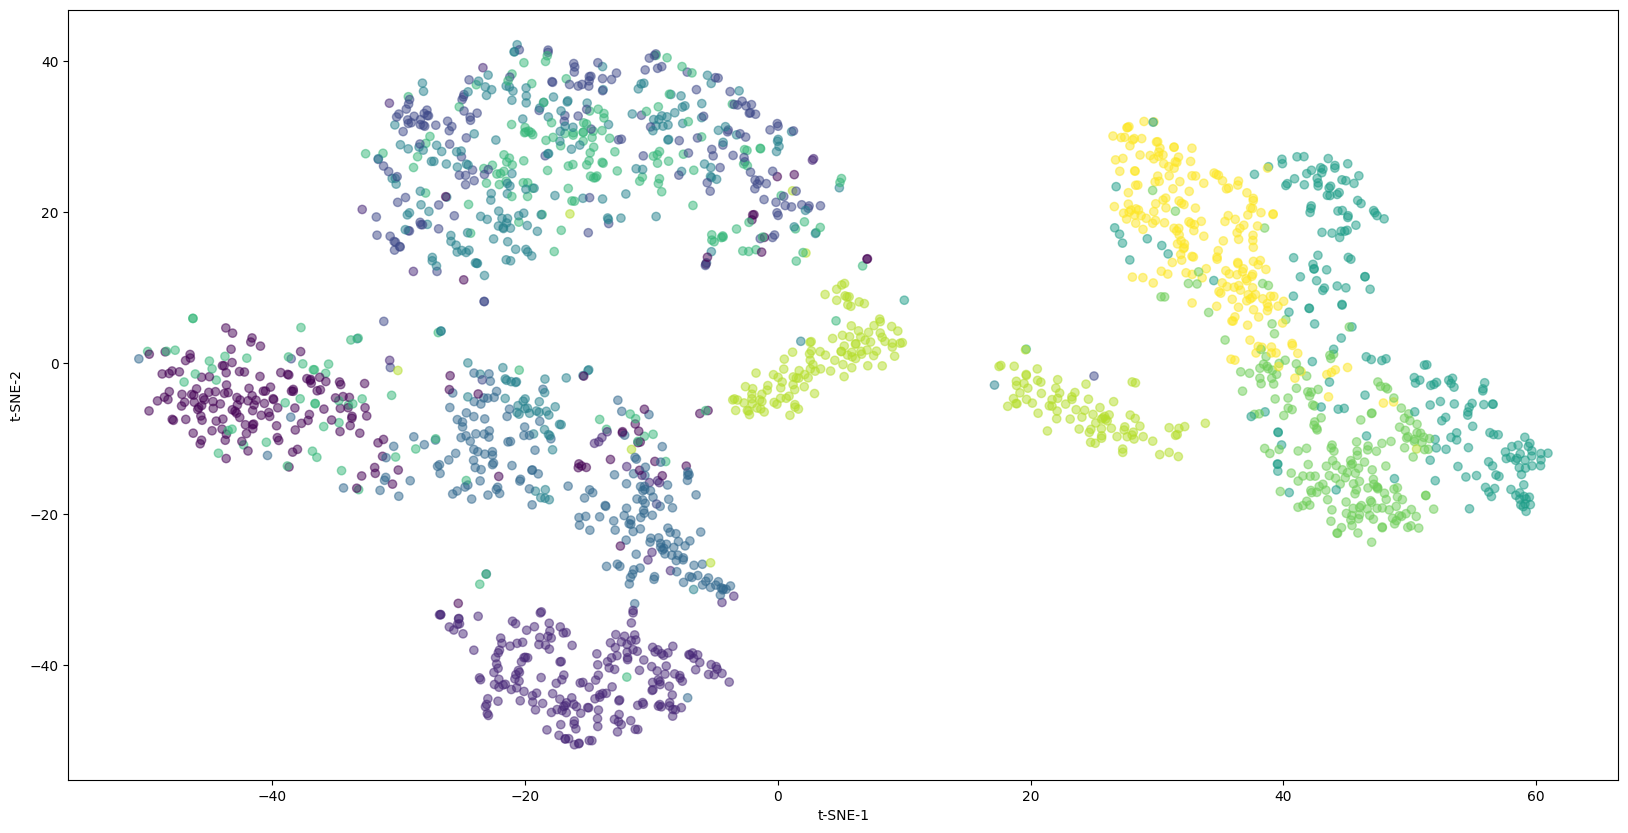

In [30]:
dataset.visualize_dataset()

In [32]:
model = Model()

model.add(Layer_Dense(X_train.shape[1], 128))
model.add(Activation_ReLU())
model.add(Layer_Dense(128, 128, weight_regularizer_l2=5e-4, bias_regularizer_l2=5e-4))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, 128))
model.add(Activation_ReLU())
model.add(Layer_Dropout(0.2))
model.add(Layer_Dense(128, len(dataset.labels)))
model.add(Activation_Softmax())

model.set(
    loss=Loss_CategoricalCrossentropy(),
    optimizer=Optimizer_Adam(learning_rate=0.001, decay=0.001),
    accuracy=Accuracy_Categorical()
)

model.finalize()

model.train(
    X_train,
    y_train, 
    validation_data=(X_valid, y_valid),
    epochs=20, 
    batch_size=128,
    early_stop=5
)

Epoch(1/20), Training:   accuracy: 0.772, loss: 0.701, learning rate: 0.000723589001447, data loss: 0.640, regularization loss: 0.061061
Epoch(1/20), Validation: accuracy: 0.835,loss: 0.441

Epoch(2/20), Training:   accuracy: 0.846, loss: 0.479, learning rate: 0.000566572237960, data loss: 0.427, regularization loss: 0.052052
Epoch(2/20), Validation: accuracy: 0.847,loss: 0.402

Epoch(3/20), Training:   accuracy: 0.866, loss: 0.422, learning rate: 0.000465549348231, data loss: 0.375, regularization loss: 0.047047
Epoch(3/20), Validation: accuracy: 0.861,loss: 0.369

Epoch(4/20), Training:   accuracy: 0.876, loss: 0.385, learning rate: 0.000395100750691, data loss: 0.341, regularization loss: 0.044044
Epoch(4/20), Validation: accuracy: 0.867,loss: 0.356

Epoch(5/20), Training:   accuracy: 0.885, loss: 0.360, learning rate: 0.000343170899108, data loss: 0.319, regularization loss: 0.042042
Epoch(5/20), Validation: accuracy: 0.875,loss: 0.339

Epoch(6/20), Training:   accuracy: 0.892, los

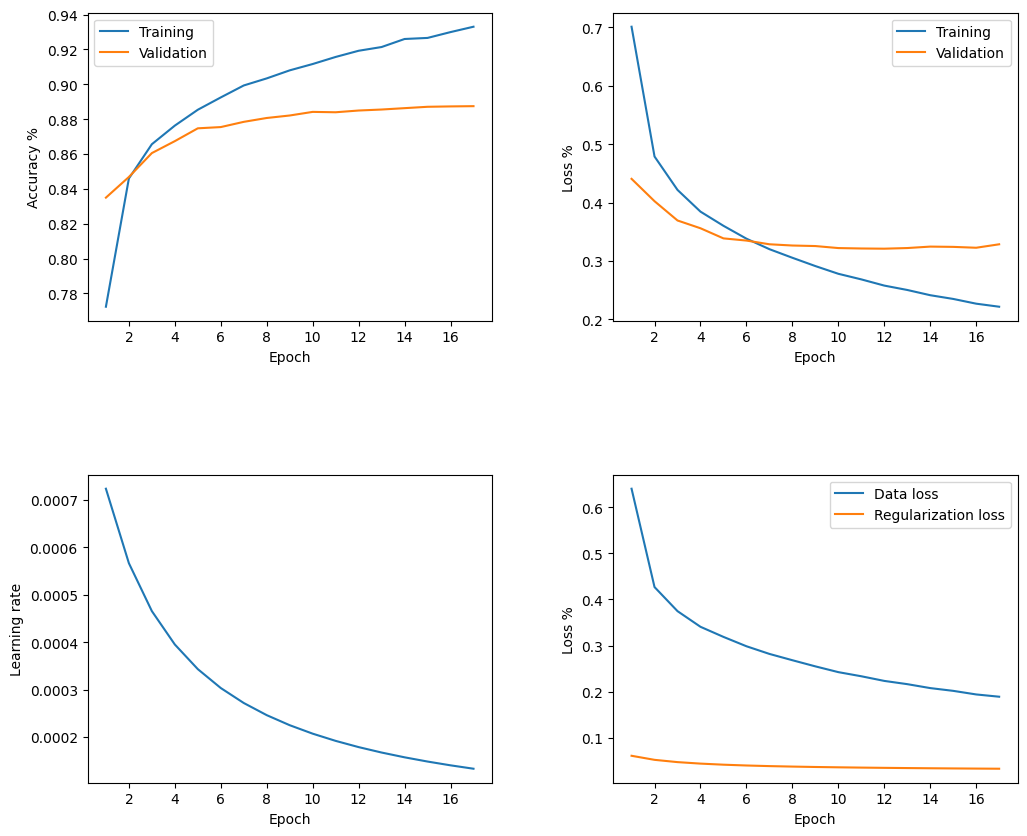

In [33]:
model.visualize_train()

In [34]:
model.evaluate(X_test, y_test) # Use test set

Evaluation: accuracy: 0.886, loss: 0.329


In [35]:
model.save("model.m")
model = Model.load("model.m")

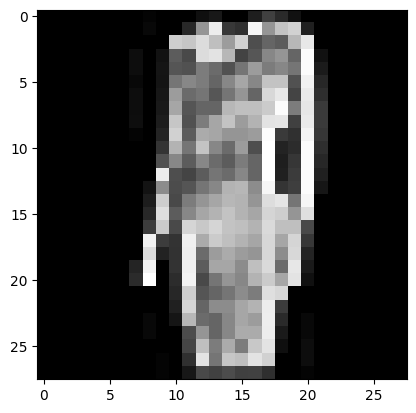

Prediction: 3, True: 3
Dress


In [45]:
fashion_mnist_labels = {   
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

img = random.randint(0, len(X_test)-1) # Random image from test batch

plt.imshow((X_test[img].reshape(28, 28)), cmap='gray')
plt.show()

prediction = model.predict(X_test[img])[0] # Pass image(s) in array
print(f"Prediction: {prediction}, True: {y_test[img]}")

print(fashion_mnist_labels[prediction])